# K mean clustering algoarithm implementation

In [8]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [3]:
print(X.shape)

(1000, 2)


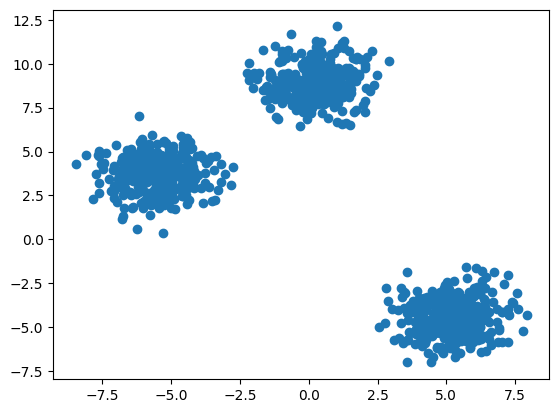

In [6]:
plt.scatter(X[:,0],X[:,1])

# here we dont need any kind of testing sets ,only we have to make clusters in the training sets so we are doing the train test split but we dont use the test part 

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# here we will find the k value using manual or elbow method 

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [12]:
wcss #its decreasing so good 

[34827.57682552021,
 7935.437286145418,
 1319.2730531585607,
 1140.4677884655125,
 991.8899785187886,
 853.3219435918772,
 756.2822183826563,
 665.5229940091419,
 578.8413627005434,
 531.2405971982863]

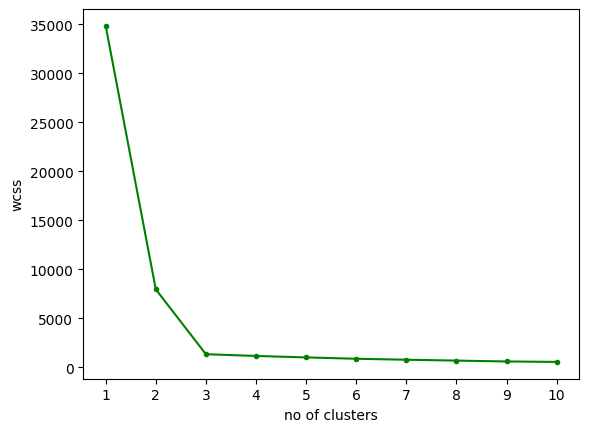

In [13]:
#plot the elbow curve 

plt.plot(range(1,11),wcss,'g.-')
plt.xticks(range(1,11))
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [16]:
y_labels=kmeans.fit_predict(X_train)

In [20]:
y_test_labels=kmeans.predict(X_test)

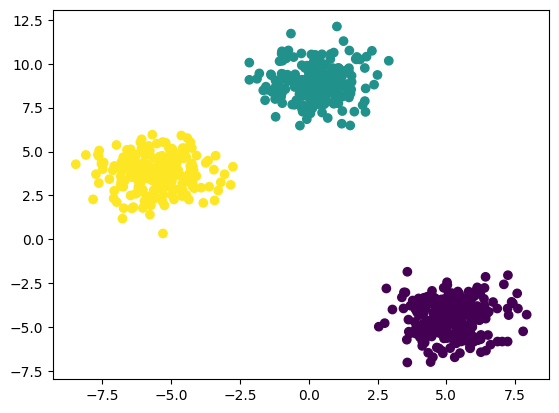

In [17]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

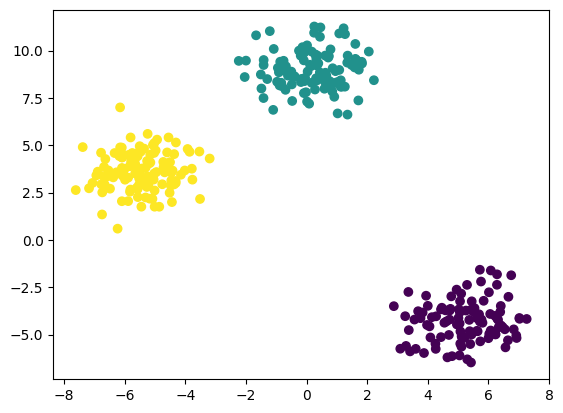

In [21]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [23]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [24]:
from kneed import KneeLocator

In [26]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow
#here it gives the same output of the above k obtained 

3